In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv("Train.csv")
one_arr=np.ones((df.shape[0],))
print(df)
print(one_arr)

      feature_1  feature_2  feature_3  feature_4  feature_5      target
0      0.293416  -0.945599  -0.421105   0.406816   0.525662  -82.154667
1     -0.836084  -0.189228  -0.776403  -1.053831   0.597997  -48.897960
2      0.236425   0.132836  -0.147723   0.699854  -0.187364   77.270371
3      0.175312   0.143194  -0.581111  -0.122107  -1.292168   -2.988581
4     -1.693011   0.542712  -2.798729  -0.686723   1.244077  -37.596722
5     -1.055329  -0.874807   0.580753  -0.773541   1.070888 -122.405263
6     -0.824707   0.499427   1.293281  -0.240671  -0.419136    1.413741
7     -1.936602   0.583708  -0.521135  -0.631724  -1.030729  -13.306543
8      0.647431  -0.265401   0.327080   0.457829  -1.757592  -25.754698
9     -1.133029  -0.839132  -0.547809   0.551768  -0.639173  -57.077754
10    -2.015734   0.102635  -0.136282  -0.021666   0.743511  -41.964694
11     0.995705   0.404433  -0.650904   0.147422  -0.373554   78.080486
12    -2.200223   0.094438  -2.430327  -0.692914  -0.668452  -93

In [3]:
x=np.c_[one_arr,df['feature_1'],df['feature_2'],df['feature_3'],df['feature_4'],df['feature_5']]


In [4]:
x

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
         0.52566183],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124,
         0.59799685],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396,
        -0.18736416],
       ...,
       [ 1.        ,  1.04417694, -0.89920649,  1.73039905, -1.87105676,
         0.44251965],
       [ 1.        , -1.2691729 , -0.00505216,  1.85766873, -1.08036482,
         0.73633394],
       [ 1.        , -1.88400025, -0.84942743, -1.45227035,  0.48861308,
         1.4595758 ]])

In [27]:
y=df['target'].values
y.reshape((-1,))
y


array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [6]:
def hypothesis(x,theta):
    return(np.dot(x,theta))


In [7]:
def error(x,theta,y):
    err=0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        err+=(hx-y[i])**2
    return err

In [8]:
def gradient(x,theta,y):
    m=x.shape[0]
    grad=np.zeros((theta.shape))
    for i in range(m):
        hx=hypothesis(x[i],theta)
        grad+=(hx-y[i])*x[i]
    return grad/m
        

In [9]:
def gradientdescent(x,y,learning_rate=0.01):
    theta=np.zeros((x.shape[1],))
    err_list=[]
    theta_list=[]
    for i in range(1000):
        grad=gradient(x,theta,y)
        err=error(x,theta,y)
        err_list.append(err)
        theta_list.append(theta)
        theta-=(learning_rate*(grad))
    return theta,err_list,theta_list
    

In [10]:
final_theta , err_list , theta_list = gradientdescent(x,y)

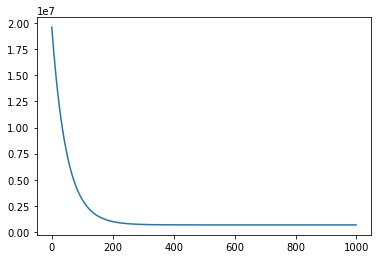

In [11]:
plt.plot(err_list)

In [12]:
print(final_theta)

[ 4.98825521 29.67987527 92.65908015  8.27756078 44.76510038  2.51769725]


In [18]:
Xtest=pd.read_csv("Test.csv")
Xtest=Xtest.values
Xtest.reshape((-1,))
print(Xtest.shape)
xtest=Xtest

(400, 5)


In [28]:
plt.scatter(x,y,label='trainingdata')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")


ValueError: shapes (400,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)